# Week 5 - Assessed exercises

This week your job is to import a dataset from seaborn and interpret it using graphical representations. First, you will need to read the help file for the seaborn function `load_dataset`, and then use it to load in the dataset called *tips*. The dataset contains information about the tips a particular waiter/waitress received, categorised by day of the week, time of the day, etc.

Submit your answers to the questions below on moodle - [Week 5 - Assessed Exercises](https://csmoodle.ucd.ie/moodle/mod/quiz/view.php?id=65073)

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

After loading in the data, you should have a quick look at it, perhaps look at the first few rows of the dataset. How many rows and columns are in the dataset?

In [6]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Apply the `value_count` method to the sex column to see what the customer demographic was. How many males are included in this dataset?

In [9]:
data["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

Create a scatter plot of the tip amount against the total bill and colour the points based on day of the week. Does the relationship between tip and total bill differ based on day of the week?

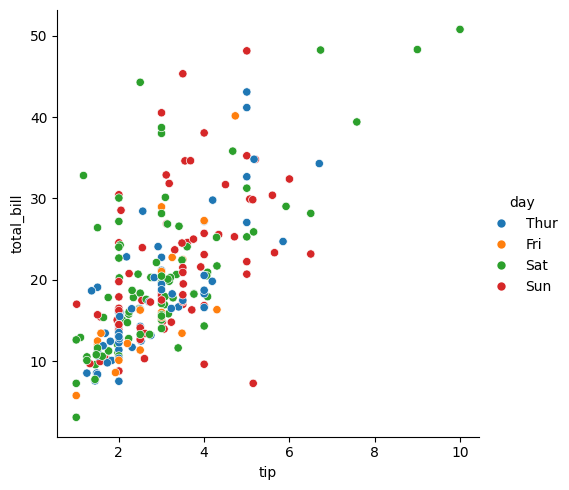

In [12]:
sns.relplot(data=data, x="tip", y="total_bill", hue="day")

Perhaps a more sensible amount to look at is the tip percentage, i.e. what percentage of the total bill was the tip? Compute the tip percentage and add it as an additional column to the DataFrame.

In [14]:
data["tip_percentage"] = data["tip"] / data["total_bill"] * 100
data

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


Create a scatter plot of the tip percentage against the total bill and colour the points based on time of the day. There are three outliers with large tip percentages. Did these occur during the lunch or the dinner shift?

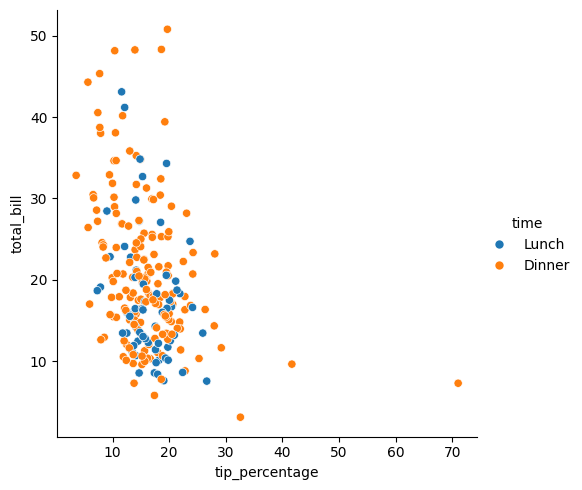

In [17]:
sns.relplot(data=data, x="tip_percentage", y="total_bill", hue="time")

If we apply the `.loc` method to a DataFrame and give a boolean condition as the index, we get back the rows of the DataFrame for which the condition is true. See the code below for an example.

In [ ]:
x = DataFrame({'a':[1,2,3,4,5,6,7,8,9,10],'b':['M','M','F','M','F','M','F','F','F','M']})
x.loc[x.b == 'M']

Plot two separtate histogram of the tip percentage, one for male customers and one for female customers. You will need to apply the `loc()` method as shown above to separate the DataFrame into male and females.

When comparing two histograms, it is a good idea to normalise them such that they total area of the histogram is the same in both plots. When using `histplot` this can be done by including `stat='density'` as an input argument.

Try out different bin definitions, e.g. `bins=10`, `bins=20`, `bins=np.arange(0,100,10)`, and play around with them until you have a relatively smooth histogram with a reasonable number of bins. See this [Statistics How To article](https://www.statisticshowto.com/choose-bin-sizes-statistics/) for more information on choosing the correct number of bins. What can we learn from the plot?

<Axes: xlabel='tip_percentage', ylabel='Density'>

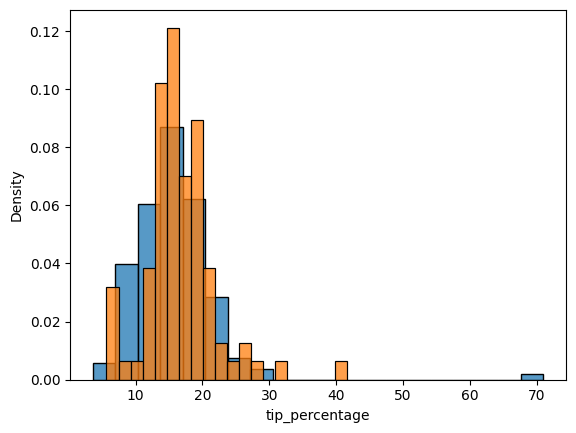

In [27]:
male = data.loc[data.sex == "Male"]
female = data.loc[data.sex == "Female"]

sns.histplot(male["tip_percentage"],stat="density",bins=20)
sns.histplot(female["tip_percentage"],stat="density",bins=20)